In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import KFold,cross_val_score,train_test_split,LeaveOneOut
from sklearn.naive_bayes import MultinomialNB

from data_load import *
from dictionaries import *

# Naive Bayes

In [2]:
model_name = 'nb_industry_only'
directory = 'quiz_data.csv'
column_list = ['architecture', 'automotive', 'business', 'construction',
       'health', 'environment', 'manufacturing', 'technology','program']

data = get_encoded_data('quiz_data.csv',model_name,'H')[0]
print(data.columns)
data = data[column_list]

Index(['program', 'problem_type', 'creative', 'outdoors', 'career',
       'group_work', 'liked_courses', 'disliked_courses', 'programming',
       'join_clubs', 'not_clubs', 'liked_projects', 'disliked_projects',
       'tv_shows', 'alternate_degree', 'expensive_equipment', 'drawing',
       'essay', 'architecture', 'automotive', 'business', 'construction',
       'health', 'environment', 'manufacturing', 'technology'],
      dtype='object')


### Leave One Out Validation

In [3]:
# Leave One Out Validation
data = get_encoded_data(directory,model_name,'H')[0]
data = data[column_list]

x_df = data.drop(axis=1,columns=["program"])
y_df = data["program"]

X = np.array(x_df) # convert dataframe into np array
Y = np.array(y_df) # convert dataframe into np array

loo = LeaveOneOut()
loo.get_n_splits(X)
accuracy = []
for train_index, test_index in loo.split(X):
  X_train, X_test = pd.DataFrame(X[train_index]), pd.DataFrame(X[test_index]) # use this for training the model
  y_train, y_test = Y[train_index].ravel(), Y[test_index].ravel() # use this for testing the model

  mnb = MultinomialNB()
  model = mnb.fit(X_train, y_train) # fit the model using training data
  accuracy.append(mnb.score(X_test, y_test))

# Calculate accuracy
mean = np.array(accuracy).mean()
variance = np.array(accuracy).std() * 2

print("nb_model_basic Accuracy: %0.4f (+/- %0.4f)" % (mean, variance))

nb_model_basic Accuracy: 0.3803 (+/- 0.9709)


### Program Output Distribution

model loaded...
{'mech': 126, 'bmed': 4, 'swe': 0, 'tron': 35, 'cive': 23, 'chem': 8, 'syde': 12, 'msci': 13, 'ce': 7, 'elec': 0, 'nano': 9, 'geo': 0, 'env': 14, 'arch-e': 1, 'arch': 4}


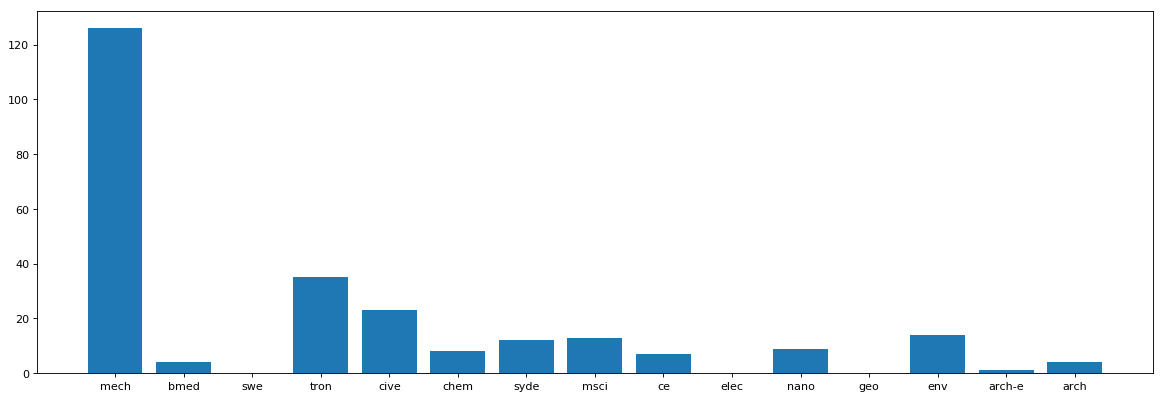

In [4]:
check_count = check_skew(model_name,column_list)
print(check_count)
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.bar(*zip(*check_count.items()))
plt.show()

### Gender Bias Distribution

        Male  Female  Other  Prefer not to say
arch      13      34      0                  0
arch-e     0       0      0                  0
bmed      38      60      0                  1
ce       145      54      1                  2
chem      25      39      0                  0
cive      72      82      1                  1
elec       0       0      0                  0
env       39      61      0                  0
geo        0       0      0                  0
mech     131      67      2                  1
msci      60      58      2                  0
nano      29      39      3                  0
swe        0       0      0                  0
syde       7      17      0                  0
tron     202      93      1                  3


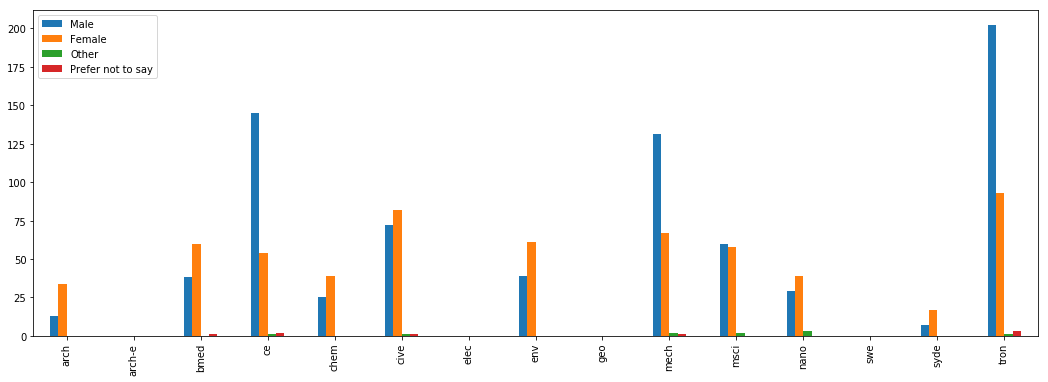

In [5]:
check_bias = check_gender_bias(directory,model_name,column_list)
df = pd.DataFrame(check_bias)
print(df)
df.plot.bar(figsize=(18,6))
plt.show()

### "Not Happy" Distribution

        mech-orig  bmed-orig  swe-orig  tron-orig  cive-orig  chem-orig  \
arch            0          0         0          0          1          0   
arch-e          1          0         0          0          3          0   
bmed            0          8         0          2          0          0   
ce              0          0         0          5          0          0   
chem            4          1         0          4          0         11   
cive            4          0         0          0          4          0   
elec            2          0         0          4          0          0   
env             2          0         0          0          0          0   
geo             0          1         0          0          1          0   
mech            7          0         0          7          0          0   
msci            1          0         0          1          0          1   
nano            1          1         0          4          0          3   
swe             0        

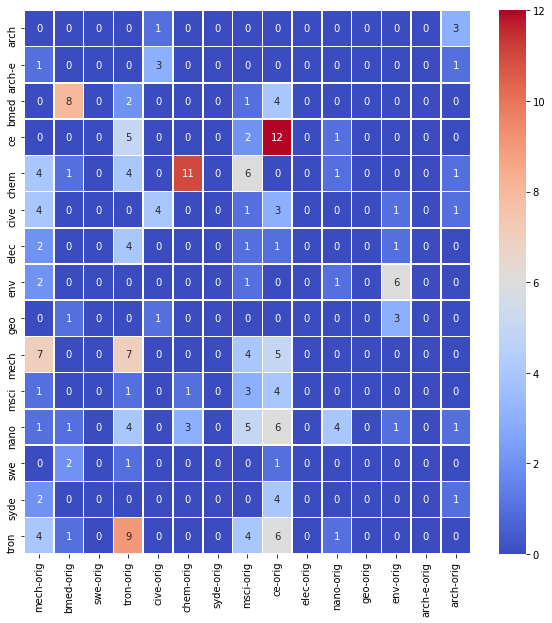

In [6]:
check_bias = check_happy_bias(directory,model_name,column_list)
df = pd.DataFrame(check_bias)
print(df)
plt.figure(figsize=(10,10))
sns.heatmap(df,cmap='coolwarm',annot=True,linewidth=0.5)

### New  Cross Validation Methods

In [15]:
# K fold

In [16]:
model = MultinomialNB()
kf = KFold(len(data), n_folds=5, random_state=None, shuffle=True)
scores = cross_val_score(model, data, CV.ravel(), cv=kf)
print("MSE of every fold in 5 fold cross validation: 1 class", abs(scores))
print("Mean of the 5 fold cross-validation: 1 class %0.2f" % abs(scores.mean()))

TypeError: __init__() got an unexpected keyword argument 'n_folds'

## Stratified K Fold

In [17]:
print "Accuracy of the model: with top 2 probability classes", 1.0*correct/len(CV2)
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=True)
X = data
y = CV.ravel()
acc_percent = 0
A = [0,0,0,0,0,0,0,0,0,0,0,0,0]
B = [0,0,0,0,0,0,0,0,0,0,0,0,0]
# print A
str_arr = []

for train_index, test_index in skf.split(X, y):
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = y[train_index], y[test_index]
	MB2 = MultinomialNB()
	# # Train the model using the training sets
	MB2.fit(X_train, y_train)	
	# print X_train[0], "sample x training data"
	# print y_train[0], "sample y training data"
	# print len(X_train), "length of training"
	predicted = MB2.predict(X_test)
	#predict the probability/likelihood of the prediction
	prob_of_pred = MB2.predict_proba(X_test)
	matrix = [[ (1 if max(prob_of_pred[j])==prob_of_pred[j][i] else 0) for i in range(13) ]for j in range(len(prob_of_pred))]
	print matrix[0]
 	for j in matrix:
 		for i in range(13):
			if j[i] == 1:
				B[i] += 1
	for i in range(len(prob_of_pred)):
		top = 0
		idxtop = 0
		second = 0
		idxsecond = 0
		third = 0
		idxthird = 0
		idxfourth = 0
		fourth = 0
		for j in range(13):
			if prob_of_pred[i][j] > top:
				idxfourth = idxthird
				idxthird = idxsecond
				third = second
				second = top
				idxsecond = idxtop
				top = prob_of_pred[i][j]
				idxtop = j
			elif prob_of_pred[i][j] > second:
				second = prob_of_pred[i][j]
				idxsecond = j
			# elif prob_of_pred[i][j] > third:
			# 	third = prob_of_pred[i][j]
			# 	idxthird = j
			# elif prob_of_pred[i][j] > fourth:
			# 	fourth = prob_of_pred[i][j]
			# 	idxfourth = j
		matrix[i][idxsecond] = 1
		# matrix[i][idxthird] = 1
		# matrix[i][idxfourth] = 1
 	correct = 0
	# print y_test
	y_test = class_var.fit_transform(y_test.astype('str'))
	y_test = y_test.reshape((len(y_test), 1))
	enc.fit(y_test)
	y_test = enc.transform(y_test).toarray()
	# print matrix
	for i in range(len(X_test)):
		for j in range(13):
			if int(y_test[i][j]) == 1 and matrix [i][j] == 1:
				correct += 1
	# print y_test[0], "y test"
	# print matrix[0], "matrix"
	# print("Number of Predictions:\n",len(predicted))
 	str_arr.append(1.0*correct/len(predicted))
 	acc_percent += (1.0*correct/len(predicted))
 	for j in matrix:
 		for i in range(13):
			if j[i] == 1:
				A[i] += 1
	print matrix[0], "matrix"
print "array of stratified", str_arr
print "the average of 5-fold is with custom NB 2 classes", acc_percent/5
print B, "1 class and the programs recommended by this strategy"
print A, "2 class and the programs recommended by this strategy"
print "correct matrix", correct_matrix
print "number of actual", by_prog
#RUN RFE - recursive feature elimination, quadratic loss, implement corss-validation

SyntaxError: invalid syntax (<ipython-input-17-f4eb317b6dcf>, line 1)